# Autoencoder on Iris Dataset 
* Source : https://www.kaggle.com/shivam1600/autoencoder-on-iris-dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing Data
data = pd.read_csv("../../data/iris.csv")
data.head()
x_train, x_test, y_train, y_test = train_test_split(data[['Sepal.Length', 'Sepal.Width',
                                                          'Petal.Length', 'Petal.Width']],
                                                    data['Species'],test_size=0.1, random_state=1)

In [9]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import RMSprop

# this is the size of our encoded representations
encoding_dim1 = 6
encoding_dim2 = 4
encoding_dim3 = 2
input_dim = 4

# this is our input placeholder
input_img = Input(shape=(input_dim,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim1)(input_img)
encoded = Dense(encoding_dim2)(encoded)
encoded = Dense(encoding_dim3)(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(encoding_dim2)(encoded)
decoded = Dense(encoding_dim1)(decoded)
decoded = Dense(input_dim)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
#encoder = decoder_layer = autoencoder.layers[3]

# create a placeholder for an encoded (2-dimensional) input
encoded_input = Input(shape=(encoding_dim3,))
# retrieve the last layer of the autoencoder model

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)
opt=RMSprop(lr=0.001)
autoencoder.compile(loss='mean_squared_error', optimizer=opt)
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 28  

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=333,
                batch_size=123,
                shuffle=True,
                validation_data=(x_test, x_test),
               callbacks=[])

# encode and decode some data points
# note that we take them from the *test* set
encoded_datapoints = encoder.predict(x_test)
decoded_datapoints = decoder.predict(encoded_datapoints)

print('Original Datapoints :')
print(x_test)
print('Reconstructed Datapoints :')
print(decoded_datapoints)

Train on 135 samples, validate on 15 samples
Epoch 1/333
135/135 [==============================] - 0s 1ms/sample - loss: 15.8880 - val_loss: 16.8465
Epoch 2/333
135/135 [==============================] - 0s 32us/sample - loss: 15.6303 - val_loss: 16.6470
Epoch 3/333
135/135 [==============================] - 0s 29us/sample - loss: 15.4440 - val_loss: 16.4382
Epoch 4/333
135/135 [==============================] - 0s 30us/sample - loss: 15.2428 - val_loss: 16.1976
Epoch 5/333
135/135 [==============================] - 0s 29us/sample - loss: 15.0108 - val_loss: 15.9117
Epoch 6/333
135/135 [==============================] - 0s 27us/sample - loss: 14.7386 - val_loss: 15.6112
Epoch 7/333
135/135 [==============================] - 0s 28us/sample - loss: 14.4550 - val_loss: 15.3075
Epoch 8/333
135/135 [==============================] - 0s 31us/sample - loss: 14.1642 - val_loss: 14.9443
Epoch 9/333
135/135 [==============================] - 0s 29us/sample - loss: 13.8192 - val_loss: 14.5615
Ep

# Plotting Encoded Features

In [11]:
encoded_dataset = encoder.predict(x_test[['Sepal.Length', 'Sepal.Width',
                                        'Petal.Length', 'Petal.Width']])

## Encode Dataset

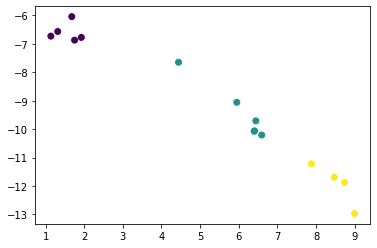

In [12]:
plt.scatter(encoded_dataset[:,0], encoded_dataset[:,1], c=y_test.astype('category').cat.codes)
plt.show()

## Decoded Dataset(reconstruncted)

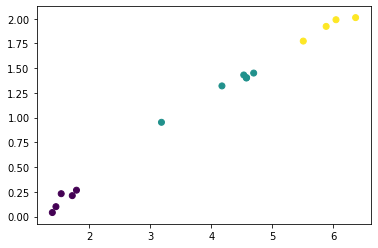

In [13]:
decoded_dataset=decoder.predict(encoded_dataset)
plt.scatter(decoded_dataset[:,2], decoded_dataset[:,3], c=y_test.astype('category').cat.codes)
plt.show()

## Orignal Data

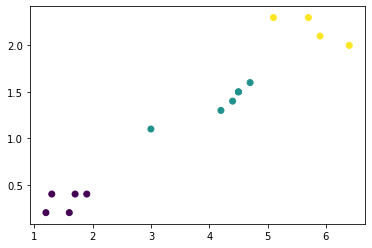

In [8]:
plt.scatter(x_test['Petal.Length'], x_test['Petal.Width'],c=y_test.astype('category').cat.codes)
plt.show()